<a href="https://colab.research.google.com/github/pretty-neat-org/siap/blob/main/DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive/SIAP

Mounted at /content/gdrive
config.json  data_mini_10k.csv	file.csv	   in_domain_train.tsv
data.csv     file5m.zip		glove.6B.300d.txt  pytorch_model.bin


## Data analysis on reddit dataset

5 million rows out of 54 million total

Load the data

In [2]:
import pandas as pd

!apt install unzip
!unzip  gdrive/MyDrive/SIAP/file5m.zip -d file

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
Archive:  gdrive/MyDrive/SIAP/file5m.zip
replace file/file5m.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [19]:
df = pd.read_csv('file/file5m.csv')
print(df.columns)

Index(['created_utc', 'ups', 'subreddit_id', 'link_id', 'name', 'score_hidden',
       'author_flair_css_class', 'author_flair_text', 'subreddit', 'id',
       'removal_reason', 'gilded', 'downs', 'archived', 'author', 'score',
       'retrieved_on', 'body', 'distinguished', 'edited', 'controversiality',
       'parent_id'],
      dtype='object')


Analyse comment lengths

In [20]:
# message length
df['comment_length'] = df['body'].apply(lambda body: len(str(body)))
df[['body','comment_length']].head()


,body,comment_length
0,くそ\n読みたいが買ったら負けな気がする\n図書館に出ねーかな,29
1,gg this one's over. off to watch the NFL draft...,54
2,Are you really implying we return to those tim...,226
3,No one has a European accent either because i...,119
4,"That the kid ""..reminds me of Kevin."" so sad...",50


Text(0.5, 1.0, 'Comment lengths')

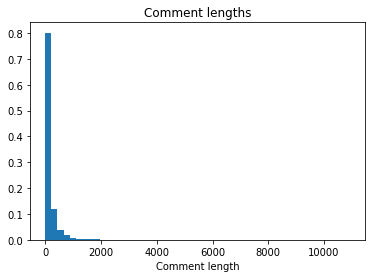

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

plt.hist(df['comment_length'], bins=50, weights=np.ones(len(df))/len(df))
plt.xlabel('Comment length')
plt.title('Comment lengths')

In [22]:
# extract controversial and non controversial
controversial = df['body'].iloc[(df['controversiality'] == 1).values]
non_controversial = df['body'].iloc[(df['controversiality'] == 0).values]
print(controversial[:10])
print(non_controversial[:10])

45     Because we aren't responsible for the actions ...
57     I honestly wouldn't have believed it if I didn...
61     There is also many intelligence service player...
160    The implications of that varies between cultur...
171    *I am a bot whose sole purpose is to improve t...
176    You're just trying to get to the front page.  ...
214    For those about to lynch this guy [here](http:...
365    True, though you can find papers about early c...
477    Yes. After days of dealing with car accidents ...
559    Icefrog went fucking mad. \n\nI have literally...
Name: body, dtype: object
0                      くそ\n読みたいが買ったら負けな気がする\n図書館に出ねーかな
1    gg this one's over. off to watch the NFL draft...
2    Are you really implying we return to those tim...
3    No one has a European accent either  because i...
4    That the kid "..reminds me of Kevin."   so sad...
5    Haha, i was getting nauseous from it, if that ...
6    After reading this, I wholeheartedly believe y...
7       Let's do th

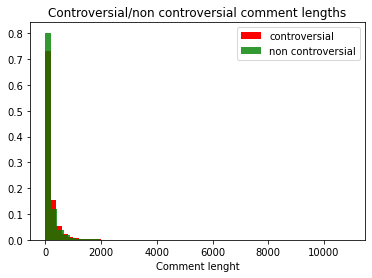

In [23]:
plt.hist(controversial.apply(lambda x: len(str(x))),
         bins=50,
         weights=np.ones(len(controversial)) / len(controversial),
         facecolor='r',
         label='controversial')
plt.hist(non_controversial.apply(lambda x: len(str(x))),
         bins=50,
         weights=np.ones(len(non_controversial)) / len(non_controversial),
         facecolor='g',
         alpha=0.8,
         label='non controversial')
plt.xlabel('Comment lenght')
plt.ylabel('')
plt.title('Controversial/non controversial comment lengths')
plt.legend()

Most common words in controversial and non controversial comments

In [24]:
# most common words in controversial comments
# import nltk
# nltk.download('punkt')
# from nltk.corpus import stopwords
# from nltk import word_tokenize
# nltk.download('stopwords')
from collections import Counter
import string
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# cleaning

cont_df = df[df.controversiality == 1]
cont_df['body'] = cont_df['body'].str.replace(r'http\S+', '')
cont_df['body'] = cont_df['body'].str.replace(r'[^\w\s]', '')
cont_df['body'] = cont_df['body'].str.replace(r"([^\x00-\x7F])+", '')
cont_df['body'] = cont_df['body'].str.lower()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [25]:
import spacy
from tqdm import tqdm
import pickle

# Load English tokenizer, tagger, parser and NER
nlp = spacy.load("en_core_web_sm")

cont = cont_df['body'].dropna()

# controversial_cleaned = []

# for text in tqdm(cont):
#     doc = nlp(text)
#     controversial_cleaned.append([token.lemma_ for token in doc if token.pos_ == "NOUN"])


with open("nouns.txt", "rb") as fp:   # Unpickling
  controversial_cleaned = pickle.load(fp)
text_controversial = [" ".join(text) for text in controversial_cleaned]
final = " ".join(text_controversial)


In [26]:
# import pickle
# with open("nouns.txt", "wb") as fp:   #Pickling
#   pickle.dump(controversial_cleaned, fp)
# with open("nouns.txt", "rb") as fp:   # Unpickling
#   b = pickle.load(fp)

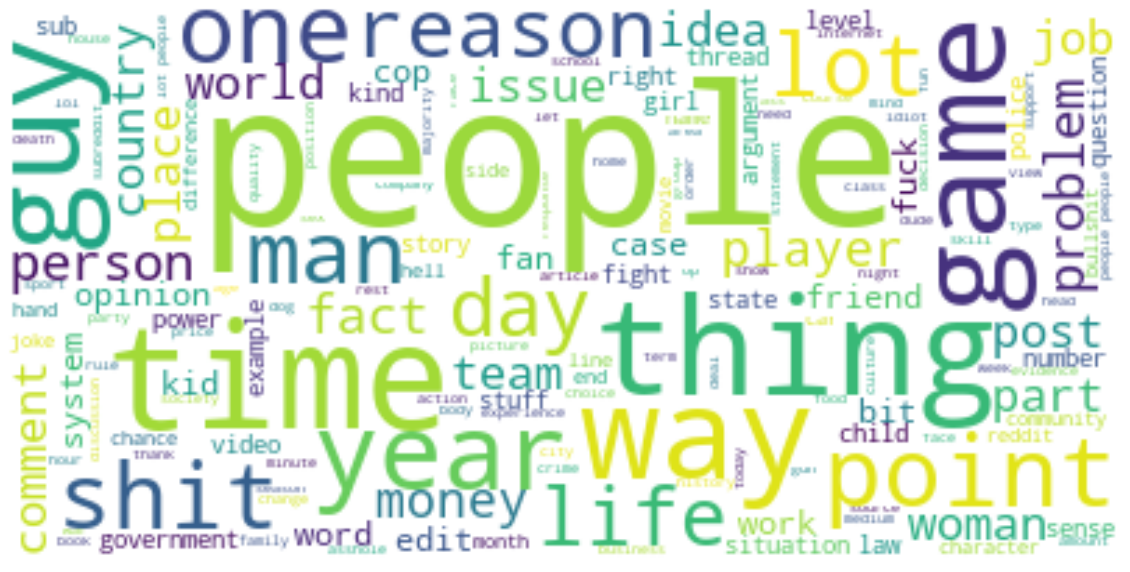

Word: people, count: 20530
Word: time, count: 8484
Word: thing, count: 7963
Word: game, count: 7632
Word: year, count: 6026
Word: way, count: 6021
Word: guy, count: 5821
Word: man, count: 4497
Word: lot, count: 4268
Word: point, count: 4179
Word: shit, count: 4083
Word: one, count: 3943
Word: woman, count: 3596
Word: money, count: 3200
Word: day, count: 3187
Word: player, count: 3175
Word: life, count: 3125
Word: reason, count: 3121
Word: team, count: 3086
Word: problem, count: 3079
Word: person, count: 2987
Word: fact, count: 2911
Word: comment, count: 2762
Word: world, count: 2682
Word: police, count: 2478
Word: post, count: 2377
Word: part, count: 2348
Word: issue, count: 2348
Word: fan, count: 2278
Word: country, count: 2116


In [27]:
wordcloud = WordCloud( background_color="white", max_font_size=70, max_words=200).generate(final)

plt.figure(figsize = (20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

filtered_words = [word for word in final.split()]
counted_words = Counter(filtered_words)

word_count = {}

for letter, count in counted_words.most_common(30):
    word_count[letter] = count
    
for i,j in word_count.items():
        print('Word: {0}, count: {1}'.format(i,j))

Dataframe column correlations

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 23 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   created_utc             int64  
 1   ups                     int64  
 2   subreddit_id            object 
 3   link_id                 object 
 4   name                    object 
 5   score_hidden            int64  
 6   author_flair_css_class  object 
 7   author_flair_text       object 
 8   subreddit               object 
 9   id                      object 
 10  removal_reason          float64
 11  gilded                  int64  
 12  downs                   int64  
 13  archived                int64  
 14  author                  object 
 15  score                   int64  
 16  retrieved_on            int64  
 17  body                    object 
 18  distinguished           object 
 19  edited                  int64  
 20  controversiality        int64  
 21  parent_id               object 

In [29]:
df.describe()

,created_utc,ups,score_hidden,removal_reason,gilded,downs,archived,score,retrieved_on,edited,controversiality,comment_length
count,5.000000e+06,5.000000e+06,5.000000e+06,0.0,5.000000e+06,5000000.0,5000000.0,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06
mean,1.430567e+09,5.768677e+00,1.852000e-03,NaN,3.220000e-04,0.0,0.0,5.768677e+00,1.432738e+09,4.317847e+07,2.469600e-02,1.646514e+02
std,7.828005e+04,4.852130e+01,4.299501e-02,NaN,2.283630e-02,0.0,0.0,4.852130e+01,1.538279e+05,2.447605e+08,1.551970e-01,3.072365e+02
min,1.430438e+09,-1.034000e+03,0.000000e+00,NaN,0.000000e+00,0.0,0.0,-1.034000e+03,1.432703e+09,0.000000e+00,0.000000e+00,1.000000e+00
25%,1.430502e+09,1.000000e+00,0.000000e+00,NaN,0.000000e+00,0.0,0.0,1.000000e+00,1.432716e+09,0.000000e+00,0.000000e+00,3.200000e+01
50%,1.430568e+09,1.000000e+00,0.000000e+00,NaN,0.000000e+00,0.0,0.0,1.000000e+00,1.432729e+09,0.000000e+00,0.000000e+00,7.800000e+01
75%,1.430631e+09,3.000000e+00,0.000000e+00,NaN,0.000000e+00,0.0,0.0,3.000000e+00,1.432742e+09,0.000000e+00,0.000000e+00,1.780000e+02
max,1.430701e+09,5.720000e+03,1.000000e+00,NaN,2.700000e+01,0.0,0.0,5.720000e+03,1.435445e+09,1.435315e+09,1.000000e+00,1.092000e+04


In [30]:
df['distinguished'] = df['distinguished'].fillna(0)
df['distinguished'] = pd.Categorical(df['distinguished'], categories=df['distinguished'].unique()).codes
df['author_flair_text_num'] = df['author_flair_text'].fillna(0)
df['author_flair_text_num'] = pd.Categorical(df['author_flair_text_num'], categories=df['author_flair_text_num'].unique()).codes
df['subreddit_num'] = df['subreddit'].fillna(0)
df['subreddit_num'] = pd.Categorical(df['subreddit_num'], categories=df['subreddit_num'].unique()).codes
df['author_num'] = df['author'].fillna(0)
df['author_num'] = pd.Categorical(df['author_num'], categories=df['author_num'].unique()).codes

In [38]:
#controversial comments by user, flair and subreddit

controversial_comments_by_author = df['author'].iloc[(df['controversiality'] == 1).values].value_counts()
df['ratio'] = df['author'].map(controversial_comments_by_author)/df['author'].map(df['author'].value_counts())
df_author = df[['author', 'ratio']].drop_duplicates()
print(df_author.sort_values(by=['ratio'], ascending=False).head(5))

controversial_comments_by_subreddit = df['subreddit'].iloc[(df['controversiality'] == 1).values].value_counts()
df['subreddit_ratio'] = df['subreddit'].map(controversial_comments_by_subreddit)/df['subreddit'].map(df['subreddit'].value_counts())
df_sub = df[['subreddit', 'subreddit_ratio']].drop_duplicates()
print(df_sub.sort_values(by=['subreddit_ratio'], ascending=False).head(5))

controversial_comments_by_flair = df['author_flair_text'].iloc[(df['controversiality'] == 1).values].value_counts()
df['flair_ratio'] = df['author_flair_text'].map(controversial_comments_by_flair)/df['author_flair_text'].map(df['author_flair_text'].value_counts())
df_flair = df[['author_flair_text', 'flair_ratio']].drop_duplicates()
print(df_flair.sort_values(by=['flair_ratio'], ascending=False).head(5))


                author  ratio
4999980      mauridany    1.0
2682555       XGDragon    1.0
2676774  pxlperfection    1.0
2677219     kubicek307    1.0
2678306     CleanNorth    1.0
                 subreddit  subreddit_ratio
2312866     CurvyAnonymous         1.000000
403668            Equality         1.000000
3657026         FPHfitness         0.857143
148709   enoughsandersspam         0.666667
964941           boobstrap         0.666667
               author_flair_text  flair_ratio
4996476            Bham in SoFlo          1.0
3339397               11/06/2014          1.0
774735    I'm REALLY FEELING IT!          1.0
777418   [GAB] - 5corch - Briggs          1.0
1581316                 HATEONME          1.0


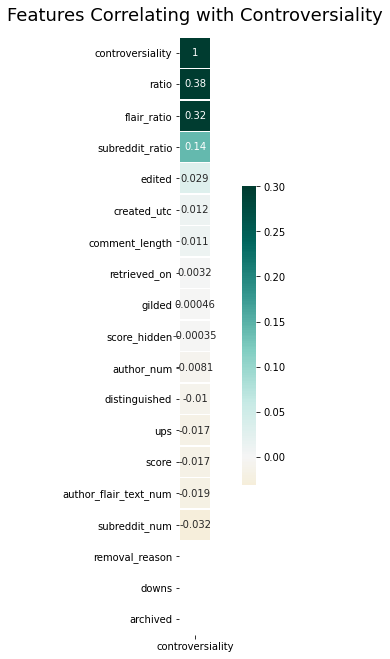

In [39]:
import seaborn as sns


corr = df.corr(method ='pearson')[['controversiality']].sort_values(by='controversiality', ascending=False)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 11))

# Draw the heatmap with the mask and correct aspect ratio
heatmap = sns.heatmap(corr,  cmap='BrBG', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
heatmap.set_title('Features Correlating with Controversiality', fontdict={'fontsize':18}, pad=16);